In [12]:
import pandas as pd
import numpy as np
import warnings
from scipy.sparse import load_npz
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


<2067x58 sparse matrix of type '<class 'numpy.float64'>'
	with 12402 stored elements in Compressed Sparse Row format>

In [2]:
#General preprocessing
df_preprocessed_general_train = load_npz('./ds_salaries_GeneralPreprocessing_train_stratified.npz')
df_preprocessed_general_test = load_npz('./ds_salaries_GeneralPreprocessing_test_stratified.npz')

#Title Clustering
df_preprocessed_TC_train = load_npz('ds_salaries_Title_Clustering_Preprocessing_train_stratified.npz')
df_preprocessed_TC_test = load_npz('ds_salaries_Title_Clustering_Preprocessing_test_stratified.npz')

#Residence Clustering
df_preprocessed_RC_train = load_npz('ds_salaries_Residence_Clustering_train_stratified.npz')
df_preprocessed_RC_test = load_npz('ds_salaries_Residence_Clustering_test_stratified.npz')

#Feature Elimination
df_preprocessed_FE_train = load_npz('ds_salaries_Feature_Elimination_train_stratified.npz')
df_preprocessed_FE_test = load_npz('ds_salaries_Feature_Elimination_test_stratified.npz')

#Combined Preprocessing
df_preprocessed_CP_train = load_npz('ds_salaries_Combined_Preprocessing_train_stratified.npz')
df_preprocessed_CP_test = load_npz('ds_salaries_Combined_Preprocessing_test_stratified.npz')

#Oversampling
df_preprocessed_oversampling_train = load_npz('./ds_salaries_Oversampling_features_train_stratified.npz')
df_target_oversampling_train = pd.read_csv('./ds_salaries_Oversampling_target_train_stratified.csv')

#General targets
df_target_train = pd.read_csv("./ds_salaries_target_train_stratified.csv")
df_target_test = pd.read_csv("./ds_salaries_target_test_stratified.csv")

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Baseline Model (Linear Regression)

In [3]:
estimator = LinearRegression()

steps = [('estimator', estimator)]

pipeline = Pipeline(steps)


print("Linear Regression: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

Linear Regression: 
--------------------------
General Preprocessing:
R2:  0.38304174650130896
MSE:  2770258150.2937417

Job Title Clustering:
R2:  0.4188341021955547
MSE:  2609543767.2412305

Employee Residence Clustering:
R2:  0.38047897365762084
MSE:  2781765480.5179796

Feature Elimination:
R2:  0.3855861542420832
MSE:  2758833282.8224363

Combined Preprocessing:
R2:  0.44037296388804326
MSE:  2512830242.763204

Oversampling:
R2:  0.12543301347909896
MSE:  3926969626.6288834



# Gradient Boosting Regression

In [4]:
estimator = GradientBoostingRegressor(learning_rate=0.1, max_depth=10, min_samples_split=20, max_features='log2', subsample=1.0, random_state = 42)
steps = [('estimator', estimator)]

pipeline = Pipeline(steps)

print("Gradient Boosting: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

Gradient Boosting: 
--------------------------
General Preprocessing:

C:\Users\Alex\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



R2:  0.4366865559482498
MSE:  2529382905.091016

Job Title Clustering:
R2:  0.4393146877168135
MSE:  2517582101.0485673



C:\Users\Alex\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Employee Residence Clustering:
R2:  0.4277799839793871
MSE:  2569375081.9490113

Feature Elimination:
R2:  0.4260060183977594
MSE:  2577340519.777221



C:\Users\Alex\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Combined Preprocessing:
R2:  0.42002787530168384
MSE:  2604183502.33173



C:\Users\Alex\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Oversampling:
R2:  0.4450663172757632
MSE:  2491756206.7148843



# eXtreme Boost Regression

In [5]:
estimator = XGBRegressor(colsample_bylevel=0.25, gamma=0, learning_rate=0.05, max_depth=5, subsample=0.5, random_state = 42)
steps = [('estimator', estimator)]

pipeline = Pipeline(steps)

print("Extreme Gradient Boosting: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

Extreme Gradient Boosting: 
--------------------------
General Preprocessing:
R2:  0.436865592765187
MSE:  2528578996.238982

Job Title Clustering:
R2:  0.4518111671377285
MSE:  2461470567.132859

Employee Residence Clustering:
R2:  0.4264257028683518
MSE:  2575456057.8730044

Feature Elimination:
R2:  0.4286109205244344
MSE:  2565644021.179113

Combined Preprocessing:
R2:  0.44018960042753397
MSE:  2513653579.055508

Oversampling:
R2:  0.42550923908622895
MSE:  2579571151.9615874



# ANNs MLP Regressor

In [6]:
warnings.filterwarnings('ignore')

estimator = MLPRegressor(hidden_layer_sizes= ( 10,), activation='relu', alpha=0.0001, solver='lbfgs', random_state = 42)
steps = [('estimator', estimator)]

pipeline = Pipeline(steps)

print("ANNs: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

ANNs: 
--------------------------
General Preprocessing:
R2:  0.3854207477957622
MSE:  2759575988.7566442

Job Title Clustering:
R2:  0.390907452244466
MSE:  2734939657.803813

Employee Residence Clustering:
R2:  0.38214505496315887
MSE:  2774284463.302398

Feature Elimination:
R2:  0.4113978406746378
MSE:  2642933974.713476

Combined Preprocessing:
R2:  0.4360053714419747
MSE:  2532441551.1495805

Oversampling:
R2:  0.43085665671825046
MSE:  2555560244.9121633



# DNNs MLP Regressor

In [7]:
warnings.filterwarnings('ignore')

estimator = MLPRegressor(hidden_layer_sizes = (10,10,10,10,10,10,10,10,10,10), solver = "adam", 
                         batch_size = 180, alpha = 0.2, activation = "relu", 
                         learning_rate= "constant", random_state = 42)
steps = [('estimator', estimator)]

pipeline = Pipeline(steps)

print("DNNs: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)
predictions_best = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

DNNs: 
--------------------------
General Preprocessing:
R2:  0.4332924672908426
MSE:  2544622999.072548

Job Title Clustering:
R2:  0.4524620663795802
MSE:  2458547907.5857434

Employee Residence Clustering:
R2:  0.435805977514536
MSE:  2533336867.2418337

Feature Elimination:
R2:  -1.6085246877495551
MSE:  11712764576.049187

Combined Preprocessing:
R2:  0.4553434308811808
MSE:  2445610041.126773

Oversampling:
R2:  0.39045451867510106
MSE:  2736973414.3910036



12


,salary_in_usd
0,91237
1,155000
2,128875
3,66022
4,190000
...,...
512,60000
513,72200
514,12608
515,95000


,Predictions
0,62037.124774
1,131909.551914
2,153829.543731
3,54558.913266
4,162067.069801
...,...
512,128936.437985
513,132434.449956
514,62287.649832
515,89978.974391


0.4553434308811808


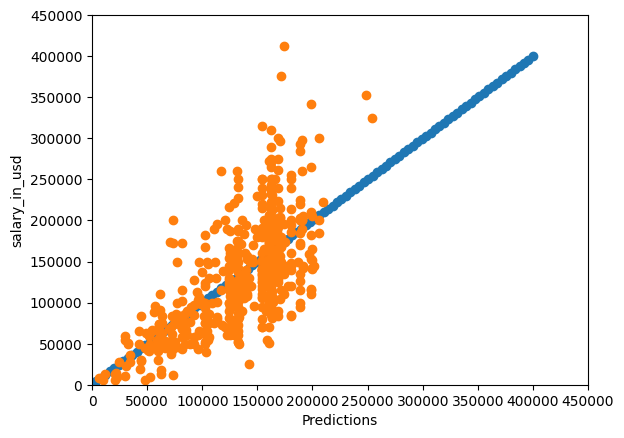

In [11]:
from scipy.sparse import hstack
import matplotlib.pyplot as plt

print(len(df_target_train[df_target_train["salary_in_usd"] > 350000]))

pred_df = pd.DataFrame(columns=["Predictions"], data=predictions_best)

df_target_blabla = df_target_test
pred_blabla = pred_df
display(df_target_blabla)
display(pred_blabla)
print(r2_score(df_target_blabla, pred_blabla))

compare_results = pd.concat([df_target_blabla, pred_blabla], axis=1)
compare_results2 = pd.concat([df_target_test, pred_df], axis=1)
x = np.linspace(0, 400000, 100)
y_actual = x + np.random.normal(0, 1, 100)  # Simulated actual values

# Plotting the data points
plt.scatter(x, y_actual, label='Actual')
plt.scatter(data=compare_results, x="Predictions", y="salary_in_usd")
# plt.scatter(data=compare_results2, x="Predictions", y="salary_in_usd")
plt.xlim(0, 450000)
plt.ylim(0, 450000)
plt.xlabel("Predictions")
plt.ylabel("salary_in_usd")
plt.show()
# Check best model

# SVR

In [9]:
warnings.filterwarnings('ignore')
estimator = SVR(C = 100, gamma = 1, kernel = 'poly')
steps = [('estimator', estimator)]

pipeline = Pipeline(steps)

print("SVR: ")
print("--------------------------")

#General Preprocessing
pipeline.fit(df_preprocessed_general_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("General Preprocessing:")
print("R2: ",  r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Title Clustering
pipeline.fit(df_preprocessed_TC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_TC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Job Title Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Residence Clustering
pipeline.fit(df_preprocessed_RC_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_RC_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Employee Residence Clustering:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Feature Elimination
pipeline.fit(df_preprocessed_FE_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_FE_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Feature Elimination:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Combined Preprocessing
pipeline.fit(df_preprocessed_CP_train, df_target_train)
predictions = pipeline.predict(df_preprocessed_CP_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Combined Preprocessing:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

#Oversampling
pipeline.fit(df_preprocessed_oversampling_train, df_target_oversampling_train)
predictions = pipeline.predict(df_preprocessed_general_test)

r2_score_holdout = r2_score(df_target_test, predictions)
mse_score_holdout = mean_squared_error(df_target_test, predictions)

print("Oversampling:")
print("R2: ", r2_score_holdout)
print("MSE: ", mse_score_holdout)
print("")

SVR: 
--------------------------
General Preprocessing:
R2:  0.4478958573921368
MSE:  2479051041.4552975

Job Title Clustering:
R2:  0.43741930842749954
MSE:  2526092709.1721215

Employee Residence Clustering:
R2:  0.4255902892746426
MSE:  2579207221.4302063

Feature Elimination:
R2:  0.42891215863773946
MSE:  2564291405.610993

Combined Preprocessing:
R2:  0.4141596798166671
MSE:  2630532799.513016

Oversampling:
R2:  0.44461902557839206
MSE:  2493764630.239773



# Analyze best model

In [10]:
r2_score_holdout_best = r2_score(df_target_test, predictions)
mse_score_holdout_best

NameError: name 'mse_score_holdout_best' is not defined